# Faces dataset decompositions


This example applies to `olivetti_faces_dataset` different unsupervised
matrix decomposition (dimension reduction) methods from the module
:py:mod:`sklearn.decomposition` (see the documentation chapter
`decompositions`) .


In [1]:
import numpy as np

In [2]:
print(__doc__)

# Authors: Vlad Niculae, Alexandre Gramfort
# License: BSD 3 clause

import logging
from time import time

from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition
from IPython.display import Markdown

%matplotlib inline

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

# #############################################################################
# Load faces data
faces = fetch_olivetti_faces(shuffle=True,
                                random_state=rng)
display(Markdown(faces.DESCR))


Automatically created module for IPython interactive environment


.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes                                40
    Samples total                         400
    Dimensionality                       4096
    Features            real, between 0 and 1
    =================   =====================

The image is quantized to 256 grey levels and stored as unsigned 8-bit 
integers; the loader will convert these to floating point values on the 
interval [0, 1], which are easier to work with for many algorithms.

The "target" for this database is an integer from 0 to 39 indicating the
identity of the person pictured; however, with only 10 examples per class, this
relatively small dataset is more interesting from an unsupervised or
semi-supervised perspective.

The original dataset consisted of 92 x 112, while the version available here
consists of 64x64 images.

When using these images, please give credit to AT&T Laboratories Cambridge.


In [3]:
n_samples, n_features = faces.data.shape

# global centering
faces_centered = faces.data - faces.data.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

In [4]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

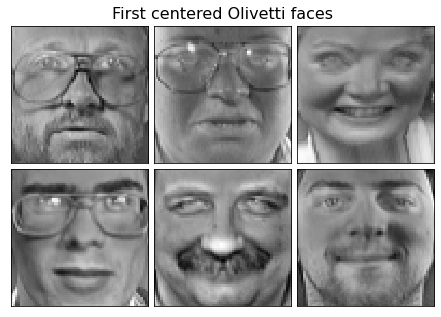

In [5]:
# #############################################################################
# Plot a sample of the input data

plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

# Trabajo Práctico 4

La actividad consiste en:

## 1
> Comprimir las imágenes aplicando PCA de manera que se preserve el 95 % de la varianza y mostrar las 8 primeras imágenes originales y descomprimidas. Crear un nuevo dataset con las imágenes comprimidas. ¿Qué número de píxeles quedan al comprimir?

En primer lugar mostraremos las 8 primeras imágenes descomprimidas:

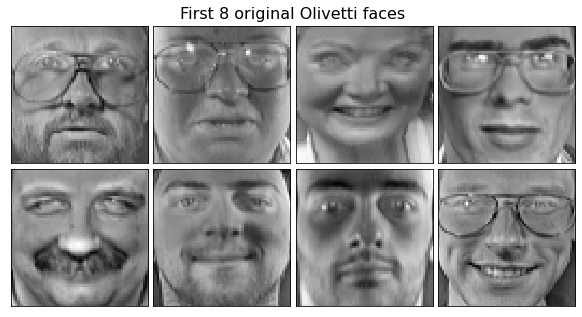

In [6]:
plot_gallery("First 8 original Olivetti faces", faces_centered[:8], n_col=4, n_row=2)

In [7]:
# Importamos el algoritmo PCA de scikit-learn
from sklearn.decomposition import PCA

# En lugar de indicar el número de componentes principales, especificaremos el porcentaje de varianza
# que queremos preservar (95%)
pca = PCA(n_components = 0.95)
faces_compressed_pca = pca.fit_transform(faces_centered)

In [8]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.18154664 0.28331196 0.35435358 0.4103197  0.45100906 0.48443052
 0.510566   0.5364291  0.5579503  0.5782901  0.5965791  0.61284673
 0.62813723 0.6417257  0.6544824  0.6664397  0.6772183  0.68680596
 0.69634354 0.70538616 0.7133813  0.7209933  0.728332   0.73530203
 0.7420663  0.74865705 0.75496405 0.76084477 0.76647496 0.7716174
 0.776603   0.7812686  0.78558207 0.7897325  0.79375404 0.79775196
 0.8015592  0.805148   0.8086593  0.81197476 0.815235   0.81841236
 0.82152075 0.82452077 0.8274556  0.8303074  0.8331343  0.83585364
 0.83846205 0.8409915  0.8434454  0.8458712  0.84818393 0.8504548
 0.8526701  0.85485214 0.8569614  0.8590222  0.8610381  0.8630455
 0.864991   0.86691904 0.86879766 0.87063265 0.8724243  0.8741706
 0.8758973  0.87759584 0.87924314 0.8808698  0.88247895 0.8840536
 0.88559735 0.8870981  0.88858145 0.8900382  0.89145446 0.89285505
 0.89424676 0.8956057  0.89694    0.89824724 0.89950895 0.9007491
 0.90197474 0.90319276 0.90437996 0.9055464  0.906706   0.9078469
 0

Como se puede observar, estamos manteniendo aún el 95% de la varianza.

In [9]:
faces_compressed_pca.shape

(400, 144)

El algoritmo, tras comprimir `faces_centered` ha reducido su dimensionalidad a 144, en lugar de 4096 como en el dataset original. Ahora, vamos a mostrar las imagenes descomprimidas.

Como ahora tenemos 144 pixeles (que es el cuadrado de 12) tendremos que recontruir la imagen en 64x64 (descomprimirla) para poder mostrarla y que tenga su dimensión original (64,64).

In [10]:
faces_uncompressed = pca.inverse_transform(faces_compressed_pca)

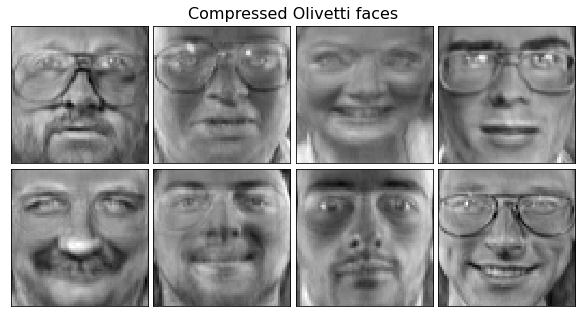

In [11]:
plot_gallery("Compressed Olivetti faces", faces_uncompressed[:8], n_col=4, n_row=2)

## 2
> Lo mismo que en 1. usando LDA.

Siguiendo el mismo proceso, vamos a mostrar las 8 primeras imágenes descomprimidas:

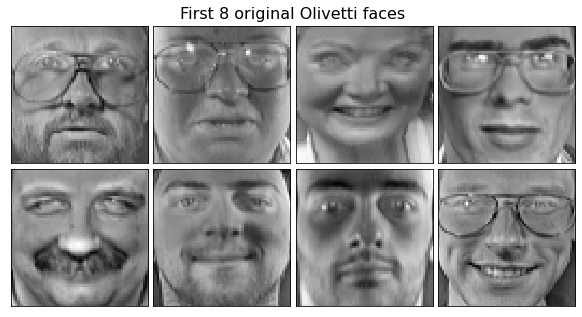

In [12]:
plot_gallery("First 8 original Olivetti faces", faces_centered[:8], n_col=4, n_row=2)

In [13]:
# Importamos el algoritmo PCA de scikit-learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# En este algoritmo no podemos especificar el % de la varianza que queremos mantener, así que vamos a probar
# a poner 29. En este caso, el máximo número de componentes permitido sería 39, puesto que es el mínimo de la
# sigueinte operación: min(n_features, n_classes - 1).
lda = LinearDiscriminantAnalysis(n_components=29)
faces_compressed_lda = lda.fit_transform(faces_centered, faces.target)

In [14]:
print(np.cumsum(lda.explained_variance_ratio_))

[0.14205506 0.23302903 0.31727772 0.39061551 0.44952345 0.49886713
 0.54716422 0.58855433 0.62862735 0.66188656 0.69436785 0.71980313
 0.74384366 0.76367843 0.78239211 0.80004047 0.81739004 0.83383646
 0.84871593 0.86282007 0.87604649 0.88830385 0.89954116 0.90987263
 0.9196768  0.92871232 0.93719146 0.94513182 0.95237443]


Y como observamos, mantenemos el 95% de la varianza

In [15]:
faces_compressed_lda.shape

(400, 29)

El algoritmo, tras comprimir `faces_centered` ha reducido su dimensionalidad a 29, en lugar de 4096 como en el dataset original. 

En este agoritmo no podemos mostrar las imagenes descomprimidas ya que LDA no dispone del método `inverse_transform()`.

Llegados a este punto, tenemos:

`faces_compressed_pca`
`faces_compressed_lda`

## 3

> Dividir los datos en conjunto de entrenamiento y test de manera que el conjunto de test sea un 20 % del total, tanto para los datos originales como para los comprimidos con PCA y LDA. Repasar la documentación de scikit-learn referida a SVM para ver si es conveniente aplicar transformaciones a los datos.

Vamos pues a dividir nuestros datasets en conjuntos de entrenamiento y conjuntos de test:

In [16]:
from sklearn.model_selection import train_test_split

X_train_original , X_test_original , y_train_original, y_test_original = train_test_split(faces.data, 
                                                                                          faces.target,
                                                                                          train_size=0.8,
                                                                                          random_state=0)
X_train_pca , X_test_pca , y_train_pca, y_test_pca = train_test_split(faces_compressed_pca, 
                                                                                          faces.target, 
                                                                                          train_size=0.8,
                                                                                          random_state=0)
X_train_lda , X_test_lda , y_train_lda, y_test_lda = train_test_split(faces_compressed_lda, 
                                                                                          faces.target, 
                                                                                          train_size=0.8,
                                                                                          random_state=0)

Ahora, vamos a aplicar una transformación a los datos muy recomendada para el uso de algoritmos SVM. El `StandartScaler`.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_original = scaler.fit_transform(X_train_original)
X_test_original = scaler.fit_transform(X_test_original)
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.fit_transform(X_test_pca)
X_train_lda = scaler.fit_transform(X_train_lda)
X_test_lda = scaler.fit_transform(X_test_lda)

## 4
> Realizar una afinación de hiperparámetros para LinearSVC y SVC con kernel ’rbf’ para la clasificación de los datos originales, realizando la búsqueda de parámetros (cambiando SVR por SVC). Usar para el parámetro ’cv’ de GridSearchCV el valor 10. Medir los tiempos en milisegundos de las dos ejecuciones de GridSearchCV. Se recomienda usar multiproceso.

In [18]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV

Creamos una función para medir el tiempo:

In [19]:
import time

def current_milli_time():
    return round(time.time() * 1000)

Definimos los hiperparámetros para `SVC` y `Linear SVC`:

In [20]:
grid_svc_params = {'kernel': ['rbf'], 
 'gamma': [1e-3, 1e-4],
 'C': [1, 10, 100, 1000]}
    
grid_linearsvc_params = {'C': [1, 10, 100, 1000]}

Realizamos la afinación de hiperparámetros para los datos originales en SVC:

In [21]:
start_ms = current_milli_time()

svc_original = SVC()
grid_original_svc_search = GridSearchCV(svc_original, grid_svc_params, cv=10, n_jobs=-1)
grid_original_svc_result = grid_original_svc_search.fit(X_train_original, y_train_original)

end_ms = current_milli_time()
original_svc_time_ms = end_ms - start_ms

/Users/javierpiquerasmartinez/UNED/MASTER-INGENIERIA-CIENCIA-DATOS/AAI/environment/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [22]:
original_svc_time_ms

13193

In [23]:
grid_original_svc_search.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

Ahora, realizamos la afinación de hiperparámetros para los datos originales en LinearSVC:

In [24]:
start_ms = current_milli_time()

svc_original = LinearSVC()
grid_original_linearsvc_search = GridSearchCV(svc_original, grid_linearsvc_params, cv=10, n_jobs=-1)
grid_original_linearsvc_result = grid_original_linearsvc_search.fit(X_train_original, y_train_original)

end_ms = current_milli_time()
original_linearsvc_time_ms = end_ms - start_ms

/Users/javierpiquerasmartinez/UNED/MASTER-INGENIERIA-CIENCIA-DATOS/AAI/environment/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/javierpiquerasmartinez/UNED/MASTER-INGENIERIA-CIENCIA-DATOS/AAI/environment/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [25]:
original_linearsvc_time_ms

663136

In [26]:
grid_original_linearsvc_search.best_params_

{'C': 1}

## 5
> Realizar una afinación de hiperparámetros para LinearSVC y SVC con kernel ’rbf’ para la clasificación de los datos comprimidos mediante PCA, realizando la búsqueda de parámetros (cambiando SVR por SVC). Usar para el parámetro ’cv’ de GridSearchCV el valor 10. Medir los tiempos en milisegundos de las dos ejecuciones de GridSearchCV. Se recomienda usar multiproceso.

Realizamos la afinación de hiperparámetros para los datos comprimidos mediante PCA en SVC:

In [27]:
start_ms = current_milli_time()

svc_pca = SVC()
grid_pca_svc_search = GridSearchCV(svc_pca, grid_svc_params, cv=10, n_jobs=-1)
grid_pca_svc_result = grid_pca_svc_search.fit(X_train_pca, y_train_pca)

end_ms = current_milli_time()
pca_svc_time_ms = end_ms - start_ms

/Users/javierpiquerasmartinez/UNED/MASTER-INGENIERIA-CIENCIA-DATOS/AAI/environment/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [28]:
pca_svc_time_ms

689

In [29]:
grid_pca_svc_search.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Ahora, realizamos la afinación de hiperparámetros para los datos comprimidos mediante PCA en LinearSVC:

In [30]:
start_ms = current_milli_time()

svc_pca = LinearSVC()
grid_pca_linearsvc_search = GridSearchCV(svc_pca, grid_linearsvc_params, cv=10, n_jobs=-1)
grid_pca_linearsvc_result = grid_pca_linearsvc_search.fit(X_train_pca, y_train_pca)

end_ms = current_milli_time()
pca_linearsvc_time_ms = end_ms - start_ms

/Users/javierpiquerasmartinez/UNED/MASTER-INGENIERIA-CIENCIA-DATOS/AAI/environment/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [31]:
pca_linearsvc_time_ms

9475

In [32]:
grid_pca_linearsvc_search.best_params_

{'C': 1}

## 6
> Realizar una afinación de hiperparámetros para LinearSVC y SVC con kernel ’rbf’ para la clasificación de los datos comprimidos mediante LDA, realizando la búsqueda de parámetros (cambiando SVR por SVC). Usar para el parámetro ’cv’ de GridSearchCV el valor 10. Medir los tiempos en milisegundos de las dos ejecuciones de GridSearchCV. Se recomienda usar multiproceso.

Realizamos la afinación de hiperparámetros para los datos comprimidos mediante PCA en SVC:

In [33]:
start_ms = current_milli_time()

svc_lda = SVC()
grid_lda_svc_search = GridSearchCV(svc_lda, grid_svc_params, cv=10, n_jobs=-1)
grid_lda_svc_result = grid_lda_svc_search.fit(X_train_lda, y_train_lda)

end_ms = current_milli_time()
lda_svc_time_ms = end_ms - start_ms

/Users/javierpiquerasmartinez/UNED/MASTER-INGENIERIA-CIENCIA-DATOS/AAI/environment/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [34]:
lda_svc_time_ms

279

In [35]:
grid_lda_svc_search.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Ahora, realizamos la afinación de hiperparámetros para los datos comprimidos mediante PCA en LinearSVC:

In [36]:
start_ms = current_milli_time()

svc_lda = LinearSVC()
grid_lda_linearsvc_search = GridSearchCV(svc_lda, grid_linearsvc_params, cv=10, n_jobs=-1)
grid_lda_linearsvc_result = grid_lda_linearsvc_search.fit(X_train_lda, y_train_lda)

end_ms = current_milli_time()
lda_linearsvc_time_ms = end_ms - start_ms

/Users/javierpiquerasmartinez/UNED/MASTER-INGENIERIA-CIENCIA-DATOS/AAI/environment/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [37]:
lda_linearsvc_time_ms

694

In [38]:
grid_lda_linearsvc_search.best_params_

{'C': 1}

## 7
> Comparar los parámetros resultantes para los mejores estimadores obtenidos en 4., 5. y 6. así como sus accuracies y los tiempos de ejecución totales de las búsquedas y la media de las búsquedas de cada GridSearchCV teniendo en cuenta el número de valores de los parámetros en cada GridSearchCV.

A continuación, se muestra una tabla con los tiempos obtenidos y los mejores parámetros:

**Tiempo(ms)**

| | SVC | LinearSVC |
| :--- | --- | --- |
| Original Data | 13193 | 663136 |
| PCA Compressed Data | 689 | 9475 |
| LDA Compressed Data | 279 | 694 |

**Mejores hiperparámetros**

| | SVC | LinearSVC |
| :--- | --- | --- |
| Original Data | `{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}` | `{'C': 1}` |
| PCA Compressed Data | `{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}` | `{'C': 1}` |
| LDA Compressed Data | `{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}` | `{'C': 1}` |

Como se puede observar, los mejores parámetros son los mismos (a excepción de gamma, con los datos originales). Por lo que no se muestran diferencias aparentes en cuanto a la elección de los mismos teniendo en cuenta el conjunto de entrenamiento y sus componentes.

No obstante, la diferencia clara está en el tiempo de entrenamiento, cuanto menor es el número de capas, el tiempo de entrenamiento se reduce considerablemente. Para este conjunto de datos puede no tener mucha importancia. Sin embargo, para conjuntos de datos mucho más grandes, esta diferencia puede ser significativa.

Probamos que tal funcionan nuestros modelos con los hiperparámetros que hemos afinado:

In [40]:
test_original_svc = SVC(C=10, gamma=0.0001, kernel='rbf')
test_original_linearsvc = LinearSVC(C=1)
test_pca_svc = SVC(C=10, gamma=0.001, kernel='rbf')
test_pca_linearsvc = LinearSVC(C=1)
test_lda_svc = SVC(C=10, gamma=0.001, kernel='rbf')
test_lda_linearsvc = LinearSVC(C=1)

test_original_svc.fit(X_train_original, y_train_original)
test_original_svc_prediction = test_original_svc.predict(X_test_original)

test_original_linearsvc.fit(X_train_original, y_train_original)
test_original_linearsvc_prediction = test_original_linearsvc.predict(X_test_original)

test_pca_svc.fit(X_train_pca, y_train_pca)
test_pca_svc_prediction = test_pca_svc.predict(X_test_pca)

test_pca_linearsvc.fit(X_train_pca, y_train_pca)
test_pca_linearsvc_prediction = test_pca_linearsvc.predict(X_test_pca)

test_lda_svc.fit(X_train_lda, y_train_lda)
test_lda_svc_prediction = test_lda_svc.predict(X_test_lda)

test_lda_linearsvc.fit(X_train_lda, y_train_lda)
test_lda_linearsvc_preditction = test_lda_linearsvc.predict(X_test_lda)

/Users/javierpiquerasmartinez/UNED/MASTER-INGENIERIA-CIENCIA-DATOS/AAI/environment/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Y miramos las matrices de confusión:

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [43]:
confusion_matrix(y_test_original, test_original_svc_prediction)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [1, 0, 0, ..., 0, 0, 2]])

In [52]:
print("Accuracy:",metrics.accuracy_score(y_test_original, test_original_svc_prediction))

Accuracy: 0.9625


In [44]:
confusion_matrix(y_test_original, test_original_linearsvc_prediction)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [1, 0, 0, ..., 0, 0, 2]])

In [53]:
print("Accuracy:",metrics.accuracy_score(y_test_original, test_original_linearsvc_prediction))

Accuracy: 0.95


In [46]:
confusion_matrix(y_test_pca, test_pca_svc_prediction)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 1, 2]])

In [54]:
print("Accuracy:",metrics.accuracy_score(y_test_pca, test_pca_svc_prediction))

Accuracy: 0.9


In [47]:
confusion_matrix(y_test_pca, test_pca_linearsvc_prediction)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 0, 3]])

In [55]:
print("Accuracy:",metrics.accuracy_score(y_test_pca, test_pca_linearsvc_prediction))

Accuracy: 0.9


In [48]:
confusion_matrix(y_test_lda, test_lda_svc_prediction)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 0, 3]])

In [56]:
print("Accuracy:",metrics.accuracy_score(y_test_lda, test_lda_svc_prediction))

Accuracy: 1.0


In [50]:
confusion_matrix(y_test_lda, test_lda_linearsvc_preditction)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 0, 3]])

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test_lda, test_lda_linearsvc_preditction))

Accuracy: 1.0


En cuanto a la interpretación de los resultados, es sorprendente ver como todos dan resultados excelentes, con un accuracy por encima del 90%. Además, es sorprendente ver que los datos comprimidos con el algoritmo lda dan mejores resultados (llegando a un accuracy del 100%).

Como aportación adicional, la mejora en los resultados puede deberse a que al reducir considerablemente las dimensiones, para el algoritmo es mucho más fácil identificar y clasificar las instancias que si tuviera muchísimas mas dimensiones.

En conclusión, podemos decir que comprimiendo los datos, hemos conseguido una diferencia significativa del tiempo de ejecución, y además hemos logrado tener un modelo cuyos resultados son excelentes (no pueden ser mejores). Por lo que la reducción de las dimensiones también nos ayuda a mejorar los resultados de nuestro modelo.